# Plots Notebook

This notebook is used only for the plots required for the purposes of the paper. If all relevant notebooks have been properly executed and have produced their outputs in the format of `.npz` files, running the present notebook should produce all the plots that are shown in the paper.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp

In [3]:
# Specify the location of the data files
data_dir = "data/"

## Section II - First Comparison Plots

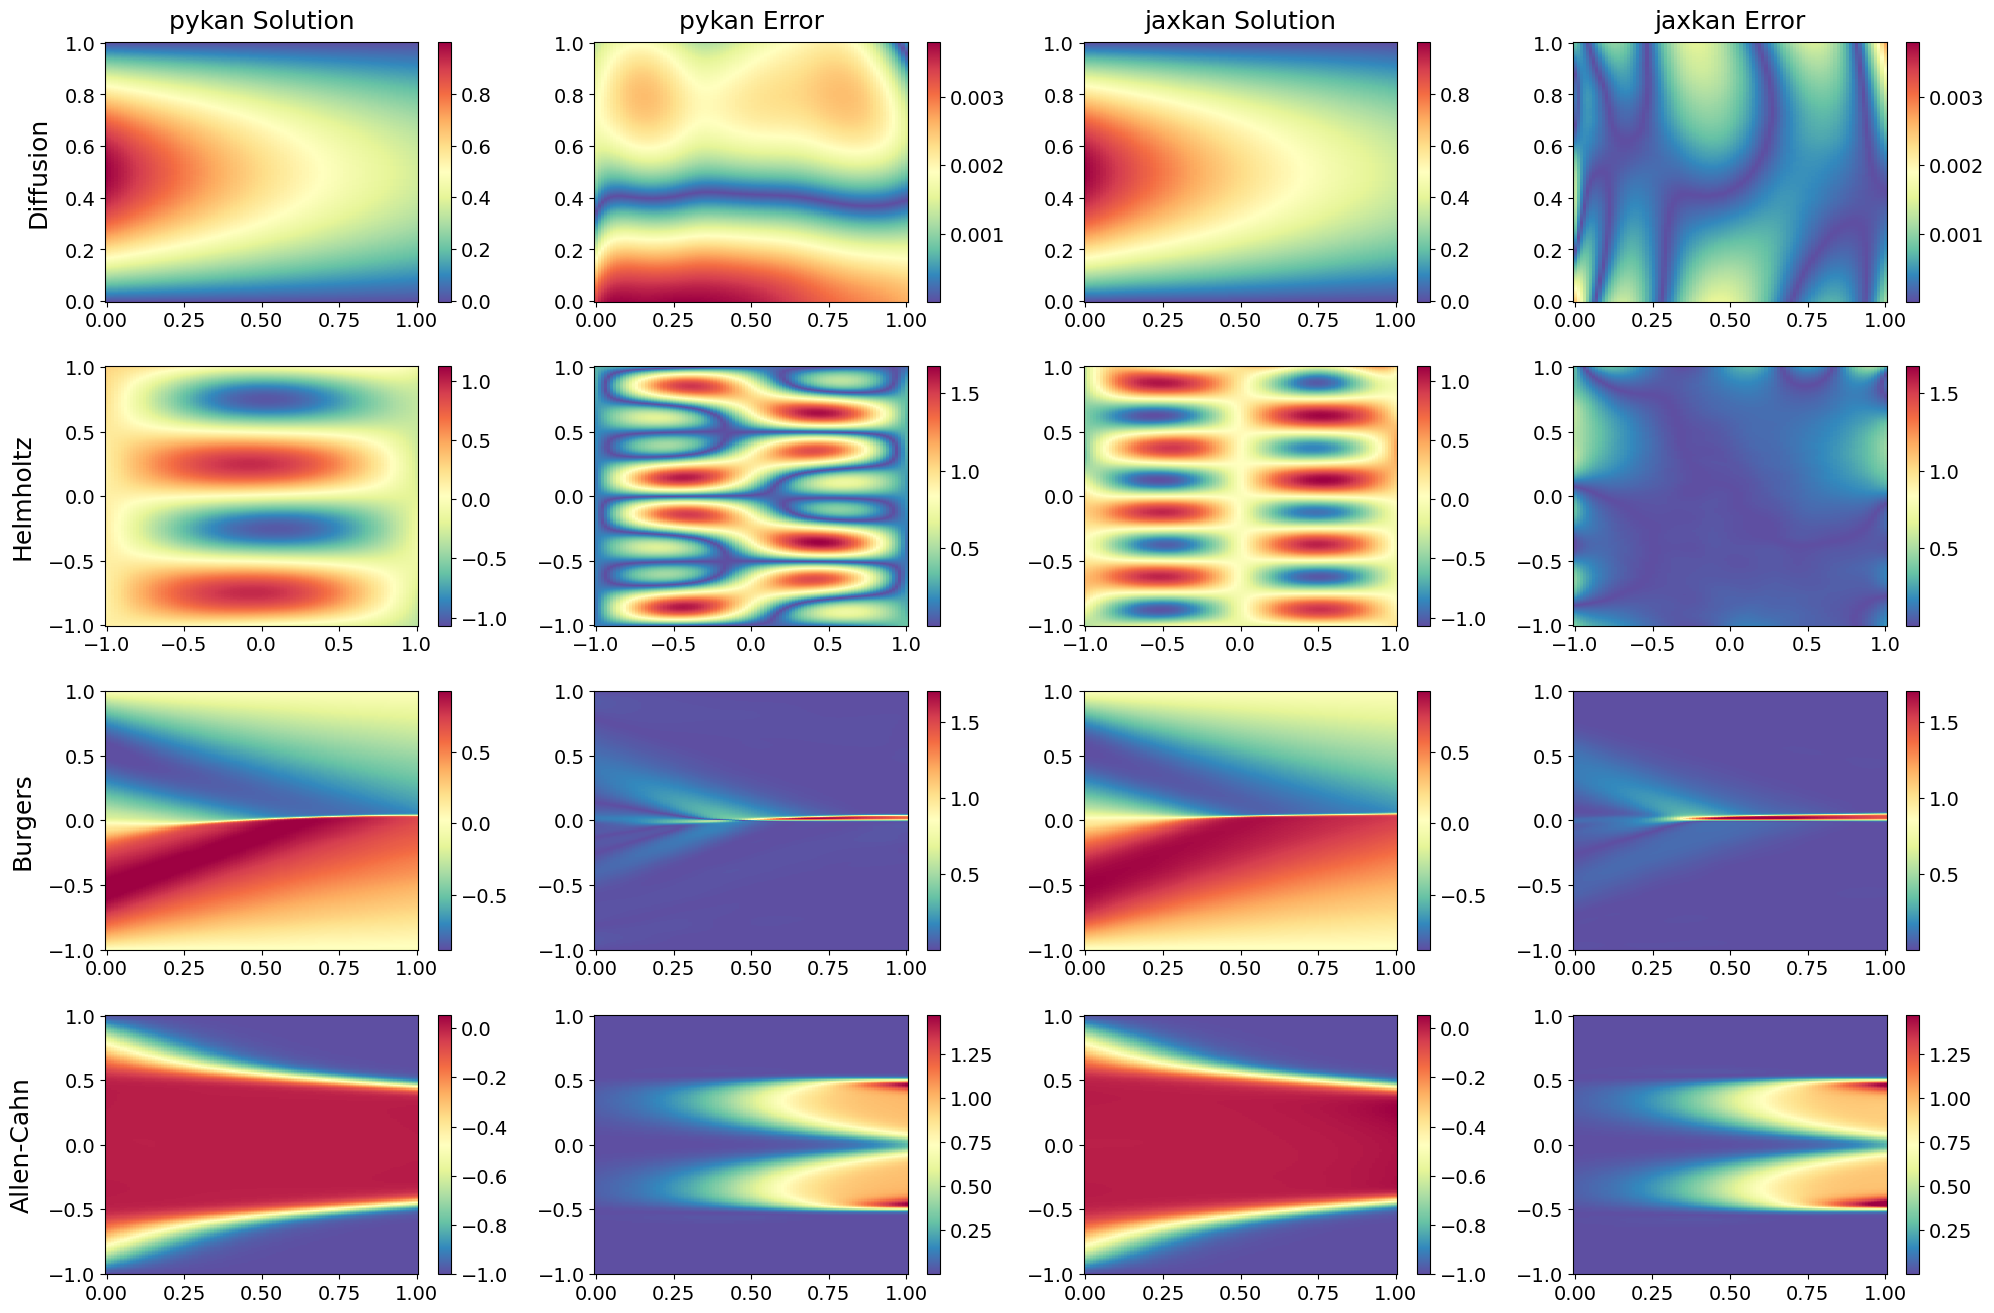

In [3]:
# Load the data
eq1_j, eq1_p = np.load(data_dir+'eq1-jaxkan.npz'), np.load(data_dir+'eq1-pykan.npz')
eq2_j, eq2_p = np.load(data_dir+'eq2-jaxkan.npz'), np.load(data_dir+'eq2-pykan.npz')
eq3_j, eq3_p = np.load(data_dir+'eq3-jaxkan.npz'), np.load(data_dir+'eq3-pykan.npz')
eq4_j, eq4_p = np.load(data_dir+'eq4-jaxkan.npz'), np.load(data_dir+'eq4-pykan.npz')

# Extract data for each equation
equations = [(eq1_j, eq1_p), (eq2_j, eq2_p), (eq3_j, eq3_p), (eq4_j, eq4_p)]

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(24, 16))

# Titles for the columns
column_titles = ['pykan Solution', 'pykan Error', 'jaxkan Solution', 'jaxkan Error']
axlabels = ["Diffusion", "Helmholtz", "Burgers", "Allen-Cahn"]

colormap = 'Spectral_r'

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
colorbar_fontsize = 14

# Iterate over each equation and plot the data
for i, (jdata,pdata) in enumerate(equations):
    try:
        t = jdata['t']
        x = jdata['x']

        # Create mesh
        T, X = np.meshgrid(t, x)
    except:
        x = jdata['x']
        y = jdata['y']

        # Create mesh
        T, X = np.meshgrid(x, y)
    ref = jdata['ref']
    jaxkan = jdata['result']
    pykan = pdata['arr_0']
    
    # Calculate errors
    pykan_error = np.abs(ref - pykan)
    jaxkan_error = np.abs(ref - jaxkan)
    
    # Plot pykan solution
    ax = axs[i, 0]
    c = ax.pcolormesh(T, X, pykan.T, shading='auto', cmap=colormap, vmin=np.min(jaxkan), vmax=np.max(jaxkan))
    cb = fig.colorbar(c, ax=ax) #, format='%.2f'
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[0], fontsize=title_fontsize, pad=10)
    
    # Plot pykan error
    ax = axs[i, 1]
    c = ax.pcolormesh(T, X, pykan_error.T, shading='auto', cmap=colormap, vmin=np.min(pykan_error), vmax=np.max(pykan_error))
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[1], fontsize=title_fontsize, pad=10)
    
    # Plot jaxkan solution
    ax = axs[i, 2]
    c = ax.pcolormesh(T, X, jaxkan.T, shading='auto', cmap=colormap, vmin=np.min(jaxkan), vmax=np.max(jaxkan))
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[2], fontsize=title_fontsize, pad=10)
    
    # Plot jaxkan error
    ax = axs[i, 3]
    c = ax.pcolormesh(T, X, jaxkan_error.T, shading='auto', cmap=colormap, vmin=np.min(pykan_error), vmax=np.max(pykan_error))
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[3], fontsize=title_fontsize, pad=10)

# Set common labels
#for ax in axs[-1, :]:
#    ax.set_xlabel('t', fontsize=label_fontsize, labelpad=10)
for idx, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(axlabels[idx], fontsize=title_fontsize, labelpad=10)

# Set tick parameters for all subplots
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.25)

#plt.tight_layout()
plt.savefig('figures/first_results.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/first_results.png', bbox_inches='tight')
plt.show()

## Appendix A - Reference Plots

### Alt Version

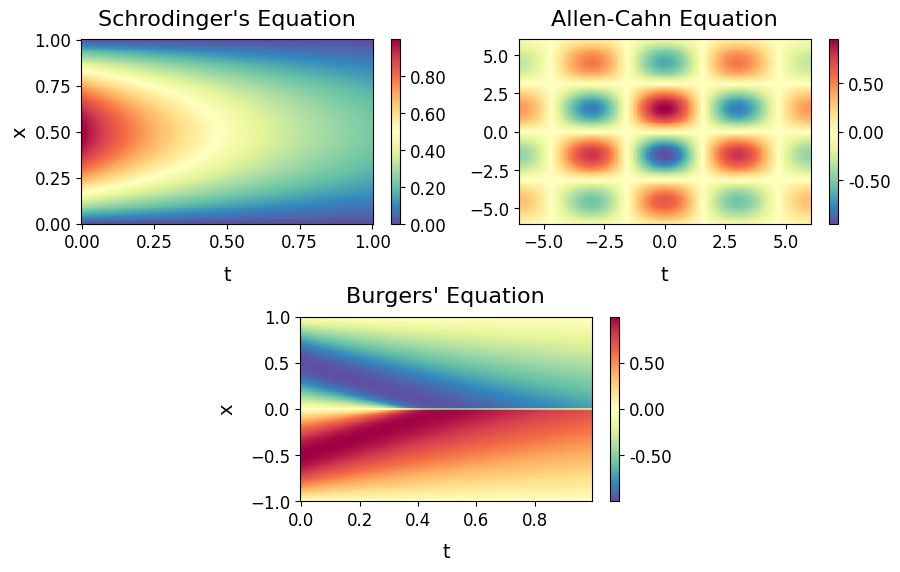

In [26]:
from matplotlib.gridspec import GridSpec

# Create a 1x3 grid of subplots for the reference solutions
fig_ref = plt.figure(figsize=(16, 6))
gs = GridSpec(ncols=6, nrows=2, figure=fig_ref)

# Font sizes
title_fontsize = 16
label_fontsize = 14
ticks_fontsize = 12
colorbar_fontsize = 12

# Titles for the columns
ref_column_titles = ["Burgers' Equation", "Schrodinger's Equation", "Allen-Cahn Equation"]

# Iterate over each equation and plot the reference data
for i, eq_data in enumerate(equations):
    t = eq_data['t']
    x = eq_data['x']
    ref = eq_data['ref']

    # Create mesh
    T, X = np.meshgrid(t, x)

    if i == 1:
        # Plot first graph in the first row, first column
        ax = fig_ref.add_subplot(gs[0, 1:3])
        ax.set_ylabel('x', fontsize=label_fontsize)
    elif i == 2:
        # Plot second graph in the first row, second column
        ax = fig_ref.add_subplot(gs[0, 3:5])
    else:
        # Plot the third graph in the second row, centered
        ax = fig_ref.add_subplot(gs[1, 2:4])
        ax.set_ylabel('x', fontsize=label_fontsize, labelpad=10)

    c = ax.pcolormesh(T, X, ref, shading='auto', cmap=colormap)
    
    ax.set_xlabel('t', fontsize=label_fontsize, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)
    
    cb = fig_ref.colorbar(c, ax=ax, format='%.2f')    
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    ax.set_title(ref_column_titles[i], fontsize=title_fontsize, pad=10)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Save the figure as a PDF with specified DPI and remove bounding box
#plt.savefig('results/rigasX.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/rigasX.png', bbox_inches='tight')
plt.show()


### Current Version

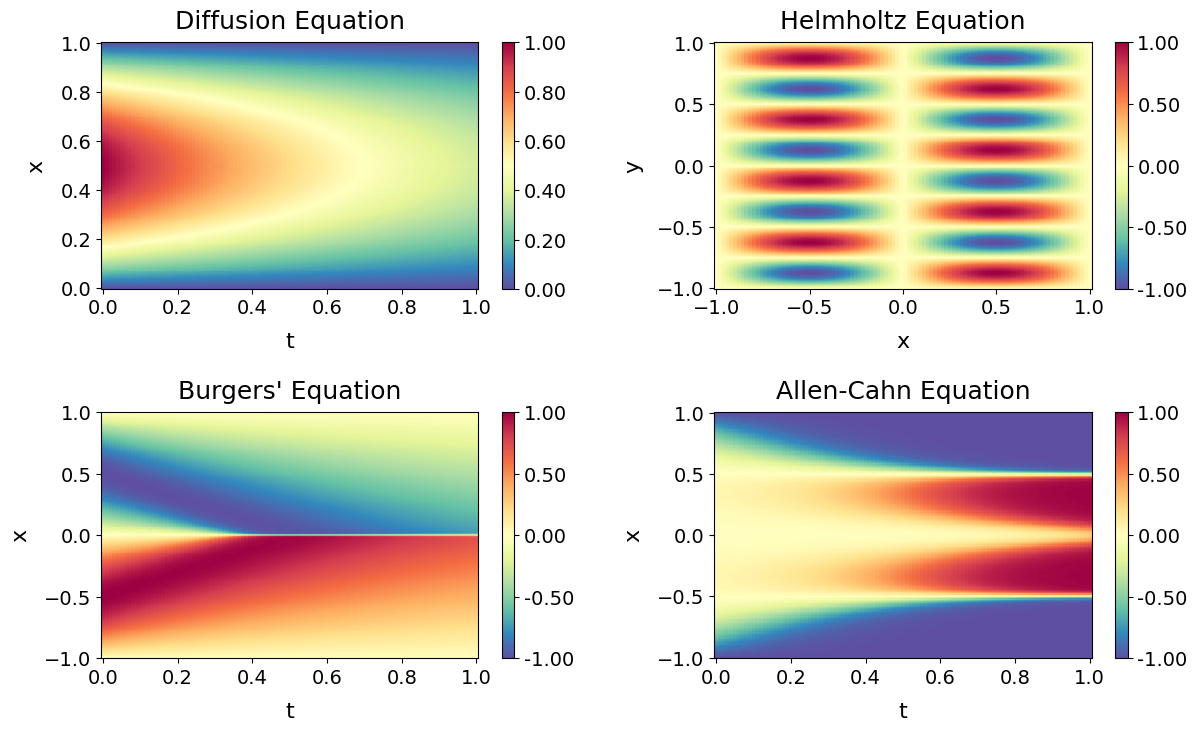

In [10]:
# Create a 1x3 grid of subplots for the reference solutions
fig_ref, axs_ref = plt.subplots(2, 2, figsize=(14, 8))

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
colorbar_fontsize = 14

# Titles for the columns
ref_column_titles = ["Diffusion Equation", "Helmholtz Equation", "Burgers' Equation", "Allen-Cahn Equation"]

# Define a helper to plot stuff in the order we want
mapping = {
    0: (0, 0),
    1: (0, 1),
    2: (1, 0),
    3: (1, 1)
}

# Iterate over each equation and plot the reference data
for i, (jdata,pdata) in enumerate(equations):
    try:
        t = jdata['t']
        x = jdata['x']

        # Create mesh
        T, X = np.meshgrid(t, x)
    except:
        x = jdata['x']
        y = jdata['y']

        # Create mesh
        T, X = np.meshgrid(x, y)
    ref = jdata['ref']
    
    # Plot reference solution
    ax = axs_ref[mapping[i]]
    if i == 0:
        c = ax.pcolormesh(T, X, ref.T, shading='auto', cmap=colormap, vmin=0.0, vmax=1.0)
    else:
        c = ax.pcolormesh(T, X, ref.T, shading='auto', cmap=colormap, vmin=-1.0, vmax=1.0)
    cb = fig_ref.colorbar(c, ax=ax, format='%.2f')
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    ax.set_title(ref_column_titles[i], fontsize=title_fontsize, pad=10)
    if i == 1:
        ax.set_xlabel('x', fontsize=label_fontsize, labelpad=10)
        ax.set_ylabel('y', fontsize=label_fontsize, labelpad=10)
    else:
        ax.set_xlabel('t', fontsize=label_fontsize, labelpad=10)
        ax.set_ylabel('x', fontsize=label_fontsize, labelpad=10)

# Set tick parameters for all subplots
for ax in axs_ref.flat:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig('figures/equations.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/equations.png', bbox_inches='tight')
plt.show()


## Section III & Appendix B - Optimizer State Plots

### Alt Version

In the alternative version, we also include the heatmap of the evolution for a given function's `c_i` first-order derivative moments.

In [27]:
grid_upds = [200, 400, 600]

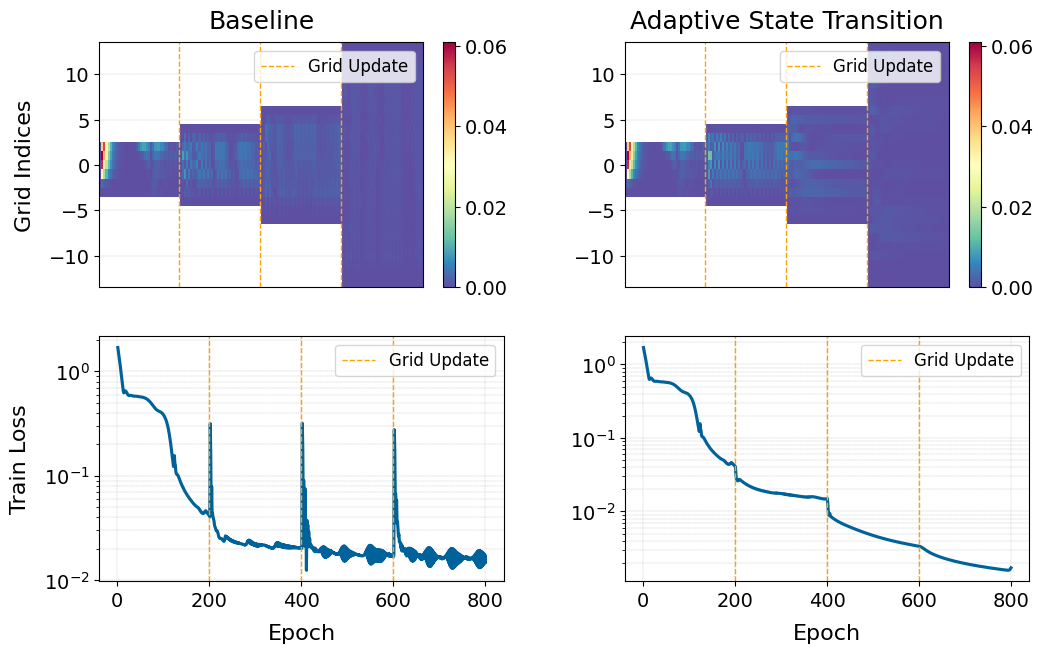

In [46]:
data_dir = "data/Section III/"

# Load the loss data
losses = np.load(data_dir+'state.npz')

# Extract the data for the plots
epochs = losses['epochs']
l_bad = losses['without_a']
l_good = losses['with_a']
LLs = [l_bad, l_good]

# Load the moment data
moments = np.load(data_dir+'state2.npz')

g_bad = moments['without_a']
g_good = moments['with_a']
logE = moments['logE']
GGs = [g_bad, g_good]

# Mod grid updates
grid_epochs = [i // logE for i in grid_upds]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# Titles for the columns
column_titles = ['Baseline', 'Adaptive State Transition']

colormap = 'Spectral_r'#sns.color_palette("flare", as_cmap=True)

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
colorbar_fontsize = 14
legend_fontsize = 12

# Iterate over each case
for i, _ in enumerate(LLs):
    loss, G = LLs[i], GGs[i]

    # Plot grid evolution
    ax = axs[0, i]
    
    t = np.arange(1,1+G.shape[0])
    maxsize = G.shape[1]
    ind = np.arange(-maxsize//2,maxsize//2)+1.0
    T, X = np.meshgrid(t, ind)

    c = ax.pcolormesh(T, X, G.T, shading='auto', cmap=colormap)
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    ax.set_axisbelow(True)
    ax.grid(True, which='both', linestyle='--', linewidth=0.25)
    ax.set_title(column_titles[i], fontsize=title_fontsize, pad=10)
    
    if i == 0:
        ax.set_ylabel('Grid Indices', fontsize=label_fontsize, labelpad=10)
    #ax.set_xlabel('Epoch', fontsize=label_fontsize, labelpad=10)
    ax.set_xticks([])

    for xc in grid_epochs:
        ax.axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Update') # #00629B

    # Legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize)
    
    
    # Plot loss
    ax = axs[1, i]
    ax.plot(epochs, loss, color='#00629B', linewidth=2.25)
    ax.set_yscale('log')
    if i == 0:
        ax.set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
    for xc in grid_upds:
        ax.axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Update')
    ax.set_xlabel('Epoch', fontsize=label_fontsize, labelpad=10)
    ax.set_axisbelow(True)
    ax.grid(True, which='both', linestyle='--', linewidth=0.25)

    # Legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize)


# Set tick parameters for all subplots
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.2)

#plt.tight_layout()
plt.savefig('results/rigas3.pdf', format='pdf', dpi=300, bbox_inches='tight')
#plt.savefig('results/rigas3.png', bbox_inches='tight')
plt.show()

### Current Version

We want three plots: two for the PDEs in Section III and one for the curve fitting case. We will generate them independently.

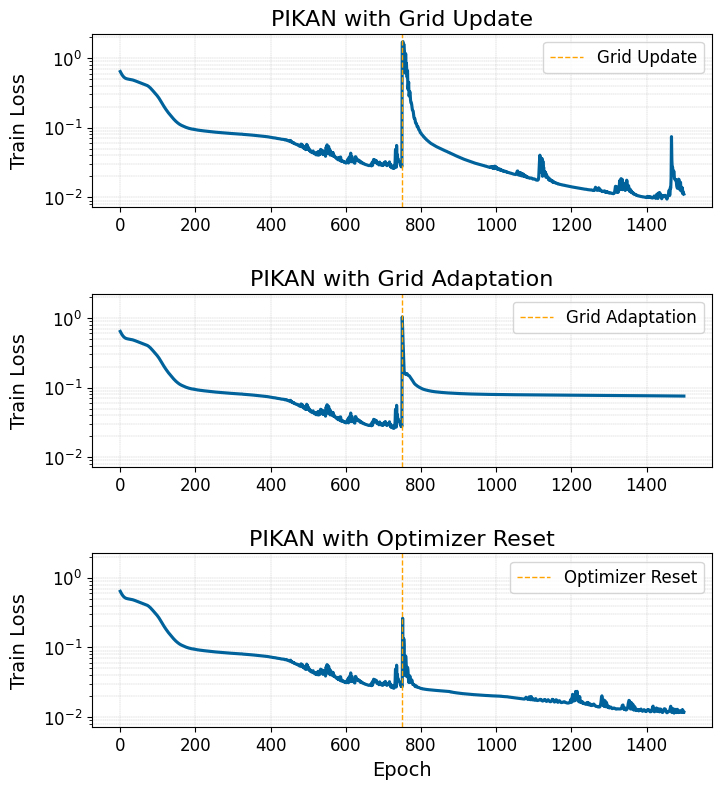

In [15]:
# ALL UPDATE PLOTS CASE

# Load the data from the .npz file
state_data = np.load(data_dir+f'state.npz')

# Extract the data for the plots
epochs = state_data['epochs']
grid_epochs = state_data['grids'][1:]
full_upd = state_data['losses_full_upd']
adapt_upd = state_data['losses_adapt_upd']
opt_upd = state_data['losses_opt_upd']

# Create the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(8, 9))

# Font sizes
title_fontsize = 16
label_fontsize = 14
ticks_fontsize = 12
legend_fontsize = 12

# Plot for 'full_upd'
axs[0].plot(epochs, full_upd, color='#00629B', linewidth=2.25)
axs[0].set_yscale('log')
axs[0].set_title('PIKAN with Grid Update', fontsize=title_fontsize)
#axs[0].set_xlabel('Epoch', fontsize=label_fontsize)
axs[0].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.25)

for xc in grid_epochs:
    axs[0].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Update')

# Get y-limits from the first plot
ylim = axs[0].get_ylim()

# Plot for 'adapt_upd'
axs[1].plot(epochs, adapt_upd, color='#00629B', linewidth=2.25)
axs[1].set_yscale('log')
axs[1].set_title('PIKAN with Grid Adaptation', fontsize=title_fontsize)
axs[1].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.25)
axs[1].set_ylim(ylim)

for xc in grid_epochs:
    axs[1].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Adaptation')

# Plot for 'opt_upd'
axs[2].plot(epochs, opt_upd, color='#00629B', linewidth=2.25)
axs[2].set_yscale('log')
axs[2].set_title('PIKAN with Optimizer Reset', fontsize=title_fontsize)
axs[2].set_xlabel('Epoch', fontsize=label_fontsize)
axs[2].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[2].grid(True, which='both', linestyle='--', linewidth=0.25)
axs[2].set_ylim(ylim)

for xc in grid_epochs:
    axs[2].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Optimizer Reset')

# Legend
handles, labels = axs[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[0].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

handles, labels = axs[1].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[1].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

handles, labels = axs[2].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[2].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

# Set tick parameters for both plots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig(f'figures/state_trans_upd.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

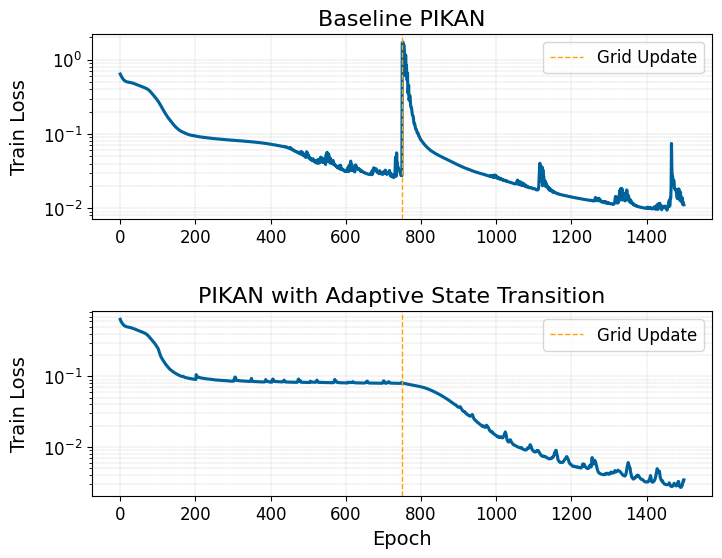

In [20]:
# WITH AND WITHOUT PLOTS CASE

# Load the data from the .npz file
state_data = np.load(data_dir+f'state.npz')

# Extract the data for the plots
epochs = state_data['epochs']
grid_epochs = state_data['grids'][1:]
full_upd = state_data['losses_full_upd']
full_res = state_data['losses_full_res']

# Create the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Font sizes
title_fontsize = 16
label_fontsize = 14
ticks_fontsize = 12
legend_fontsize = 12

# Plot for 'full_upd'
axs[0].plot(epochs, full_upd, color='#00629B', linewidth=2.25)
axs[0].set_yscale('log')
axs[0].set_title('Baseline PIKAN', fontsize=title_fontsize)
#axs[0].set_xlabel('Epoch', fontsize=label_fontsize)
axs[0].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.25)

for xc in grid_epochs:
    axs[0].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Update')

# Plot for 'adapt_upd'
axs[1].plot(epochs, full_res, color='#00629B', linewidth=2.25)
axs[1].set_yscale('log')
axs[1].set_title('PIKAN with Adaptive State Transition', fontsize=title_fontsize)
axs[1].set_xlabel('Epoch', fontsize=label_fontsize)
axs[1].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.25)

for xc in grid_epochs:
    axs[1].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Update')

# Legend
handles, labels = axs[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[0].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

handles, labels = axs[1].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[1].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

# Set tick parameters for both plots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig(f'figures/state_trans_res.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

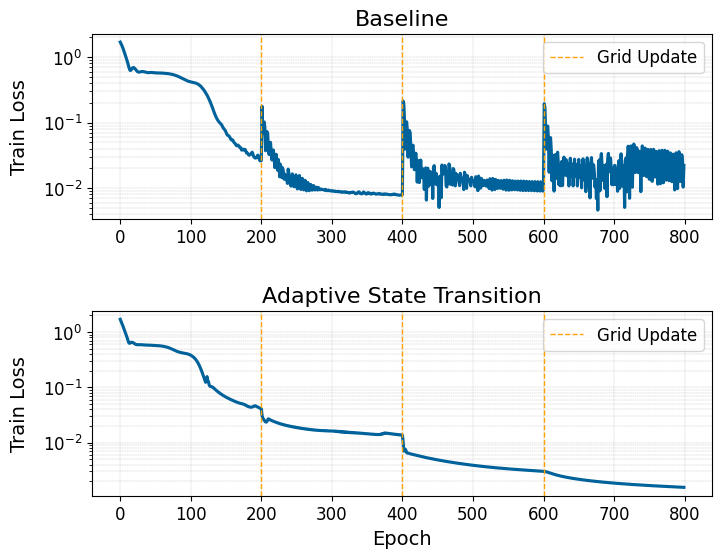

In [5]:
# CURVE FITTING CASE

# Load the data from the .npz file
state_data = np.load(data_dir+f'state_curve.npz')

# Extract the data for the plots
epochs = state_data['epochs']
grid_epochs = state_data['grids'][1:]
without_a = state_data['without_a']
with_a = state_data['with_a']

# Create the figure and axes for the two plots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Font sizes
title_fontsize = 16
label_fontsize = 14
ticks_fontsize = 12
legend_fontsize = 12

# Plot for 'without_a'
axs[0].plot(epochs, without_a, color='#00629B', linewidth=2.25)
axs[0].set_yscale('log')
axs[0].set_title('Baseline', fontsize=title_fontsize)
#axs[0].set_xlabel('Epoch', fontsize=label_fontsize)
axs[0].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.25)

# Plot for 'with_a'
axs[1].plot(epochs, with_a, color='#00629B', linewidth=2.25)
axs[1].set_yscale('log')
axs[1].set_title('Adaptive State Transition', fontsize=title_fontsize)
axs[1].set_xlabel('Epoch', fontsize=label_fontsize)
axs[1].set_ylabel('Train Loss', fontsize=label_fontsize, labelpad=10)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.25)

# Draw vertical dashed lines and add them to the legend
for ax in axs:
    for xc in grid_epochs:
        ax.axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Update')

# Legend
handles, labels = axs[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[0].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

handles, labels = axs[1].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[1].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

# Set tick parameters for both plots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig(f'figures/state_trans_curve.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

## Section III - Adaptive Loss Plots

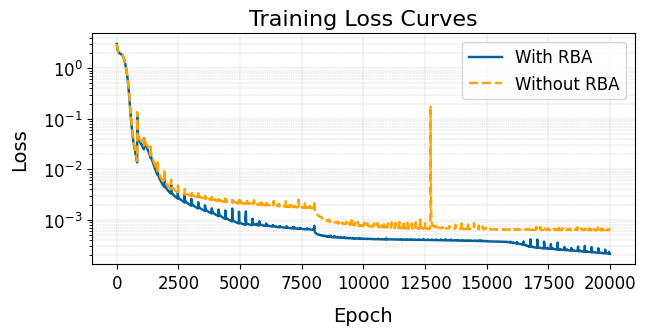

In [3]:
# Load the data from the .npz file
rba = np.load(data_dir+'rba.npz')

# Extract the data for the plots
epochs = rba['epochs']
loss1 = rba['loss1']
loss2 = rba['loss2']

# Create the figure and axes for the two plots
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

# Font sizes
title_fontsize = 16
label_fontsize = 14
ticks_fontsize = 12
legend_fontsize = 12

# Plot
pl1 = ax.plot(epochs, loss1, color='#00629B', linewidth=1.75, label='With RBA')
pl2 = ax.plot(epochs, loss2, color='#FFA300', linestyle='--', linewidth=1.75, label='Without RBA')
ax.set_yscale('log')
ax.set_title('Training Loss Curves', fontsize=title_fontsize)
ax.set_xlabel('Epoch', fontsize=label_fontsize, labelpad=10)
ax.set_ylabel('Loss', fontsize=label_fontsize, labelpad=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.25)

# Legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

# Set tick parameters
ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig('figures/rba.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

## Section III - Adaptive Collocations Plots

### Horizontal Version

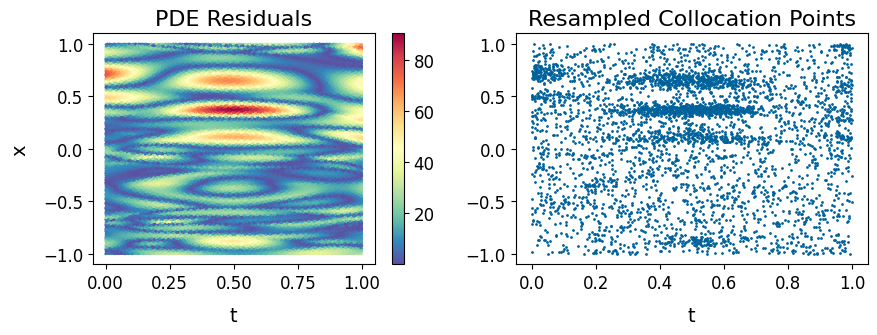

In [7]:
ac = np.load(data_dir+'collocs.npz')
sample = ac['sample']
resids = ac['resids']
collocs = ac['collocs']

# Create the figure and axes for the two plots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Font sizes
title_fontsize = 16
label_fontsize = 14
ticks_fontsize = 12
legend_fontsize = 12
colorbar_fontsize = 12

# Plot for pde residual
ax = axs[0]
sca = ax.scatter(sample[:,0], sample[:,1], c=resids, cmap='Spectral_r', s=1)
ax.set_title('PDE Residuals', fontsize=title_fontsize)
ax.set_xlabel('t', fontsize=label_fontsize, labelpad=10)
ax.set_ylabel('x', fontsize=label_fontsize, labelpad=10)

cb = fig.colorbar(sca, ax=ax)
cb.ax.tick_params(labelsize=colorbar_fontsize)

# Plot for collocation points
ax = axs[1]
ax.scatter(collocs[:,0], collocs[:,1], s=1, color='#00629B')
ax.set_title('Resampled Collocation Points', fontsize=title_fontsize)
ax.set_xlabel('t', fontsize=label_fontsize, labelpad=10)

for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig('figures/collocs_h.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/collocs_h.png', bbox_inches='tight')

plt.show()

## Section III - Adaptive Training Results Plots

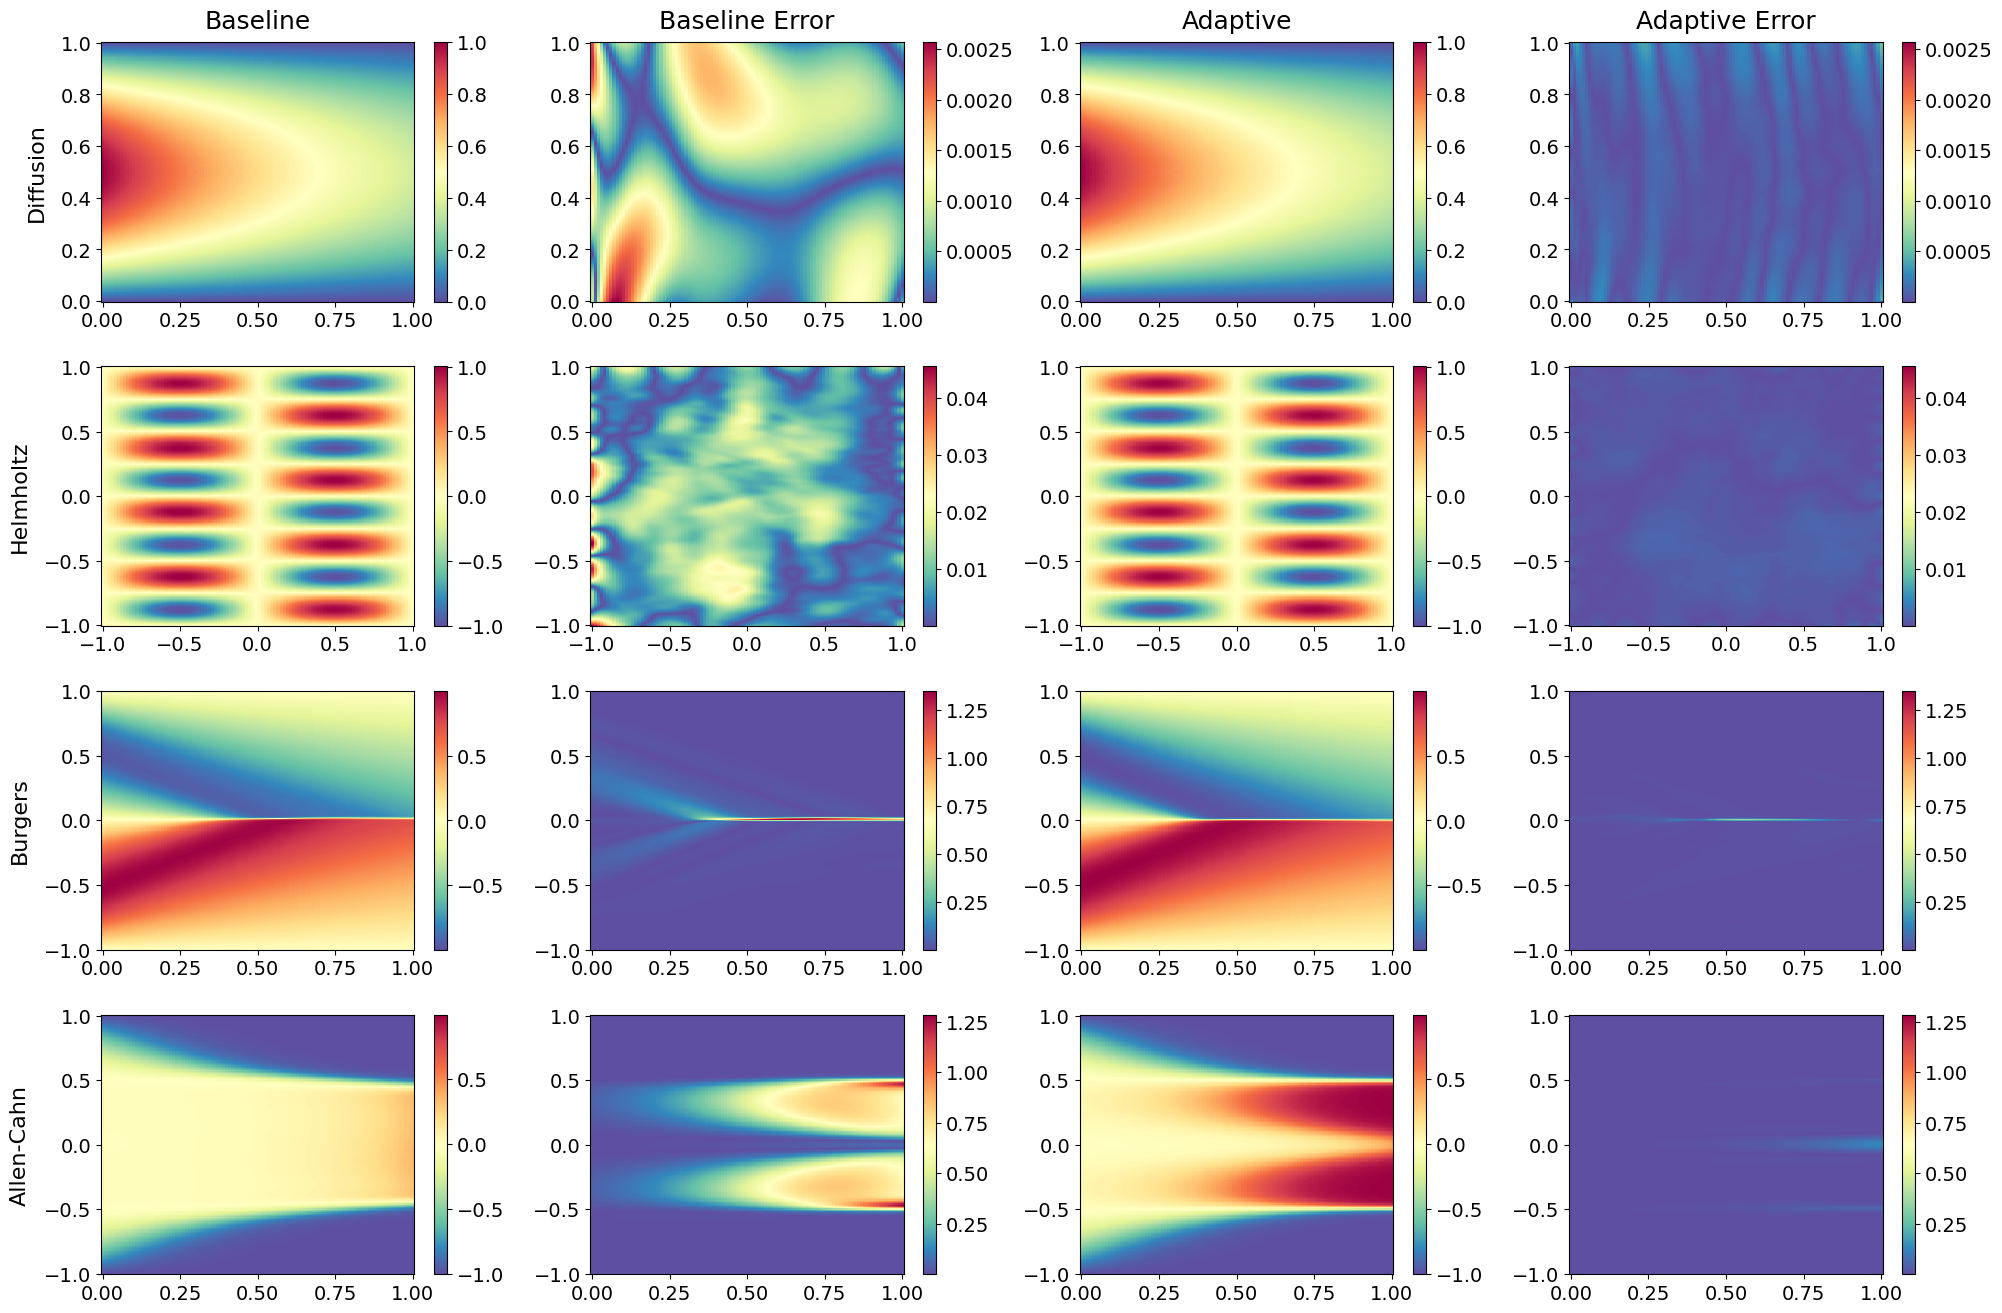

In [13]:
# Load the data
eq1_a, eq1_b = np.load(data_dir+'eq1-adapt.npz'), np.load(data_dir+'eq1-base.npz')
eq2_a, eq2_b = np.load(data_dir+'eq2-adapt.npz'), np.load(data_dir+'eq2-base.npz')
eq3_a, eq3_b = np.load(data_dir+'eq3-adapt.npz'), np.load(data_dir+'eq3-base.npz')
eq4_a, eq4_b = np.load(data_dir+'eq4-adapt.npz'), np.load(data_dir+'eq4-base.npz')

# Extract data for each equation
equations = [(eq1_a, eq1_b), (eq2_a, eq2_b), (eq3_a, eq3_b), (eq4_a, eq4_b)]

# Create a 3x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(24, 16))

# Titles for the columns
column_titles = ['Baseline', 'Baseline Error', 'Adaptive', 'Adaptive Error']
axlabels = ["Diffusion", "Helmholtz", "Burgers", "Allen-Cahn"]

colormap = 'Spectral_r'

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
colorbar_fontsize = 14

# Iterate over each equation and plot the data
for i, (adata,bdata) in enumerate(equations):
    try:
        t = adata['t']
        x = adata['x']

        # Create mesh
        T, X = np.meshgrid(t, x)
    except:
        x = adata['x']
        y = adata['y']

        # Create mesh
        T, X = np.meshgrid(x, y)
    ref = adata['ref']
    adaptive = adata['adaptive']
    baseline = bdata['baseline']
    
    # Calculate errors
    try:
        a_error = np.abs(ref - adaptive)
        b_error = np.abs(ref - baseline)
    except:
        a_error = np.abs(ref.T - adaptive)
        b_error = np.abs(ref.T - baseline)
    # Plot pykan solution
    ax = axs[i, 0]
    c = ax.pcolormesh(T, X, baseline.T, shading='auto', cmap=colormap, vmin=np.min(adaptive), vmax=np.max(adaptive))
    cb = fig.colorbar(c, ax=ax) #, format='%.2f'
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[0], fontsize=title_fontsize, pad=10)
    
    # Plot pykan error
    ax = axs[i, 1]
    c = ax.pcolormesh(T, X, b_error.T, shading='auto', cmap=colormap, vmin=np.min(b_error), vmax=np.max(b_error))
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[1], fontsize=title_fontsize, pad=10)
    
    # Plot jaxkan solution
    ax = axs[i, 2]
    c = ax.pcolormesh(T, X, adaptive.T, shading='auto', cmap=colormap, vmin=np.min(adaptive), vmax=np.max(adaptive))
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[2], fontsize=title_fontsize, pad=10)
    
    # Plot jaxkan error
    ax = axs[i, 3]
    c = ax.pcolormesh(T, X, a_error.T, shading='auto', cmap=colormap, vmin=np.min(b_error), vmax=np.max(b_error))
    cb = fig.colorbar(c, ax=ax)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    if i == 0:
        ax.set_title(column_titles[3], fontsize=title_fontsize, pad=10)

# Set common labels
#for ax in axs[-1, :]:
#    ax.set_xlabel('t', fontsize=label_fontsize, labelpad=10)
for idx, ax in enumerate(axs[:, 0]):
    ax.set_ylabel(axlabels[idx], fontsize=label_fontsize, labelpad=10)

# Set tick parameters for all subplots
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.25, hspace=0.25)

#plt.tight_layout()
plt.savefig('figures/adaptive_results.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/adaptive_results.png', bbox_inches='tight')
plt.show()

## Section IV - Spline Basis Plots

In [7]:
import os
import sys

# Add /src to path
path_to_src = os.path.abspath(os.path.join(os.getcwd(), '../../../src'))
if path_to_src not in sys.path:
    sys.path.append(path_to_src)

# import necessary stuff
from bases.splines import get_spline_basis

# Preliminaries
N = 5
num_x = 200
k = 3

# Function that performs grid augmentation for B-splines
def augment_grid(grid, k):
    grid = jnp.array(grid)
    h = (grid[:, [-1]] - grid[:, [0]]) / grid.shape[1]
    left = jnp.squeeze((jnp.arange(k, 0, -1)*h[:,None]), axis=1) 
    right = jnp.squeeze((jnp.arange(1, k+1)*h[:,None]), axis=1) 
    grid = jnp.concatenate(
            [
                grid[:, [0]] - left,
                grid,
                grid[:, [-1]] + right
            ],
            axis=1,
        )
    return np.array(grid)

# -------------------------
# Define uniform grid
# -------------------------
uni_grid = np.array([np.arange(0.0,1.0*N)])
uni_grid_aug = augment_grid(uni_grid,k)
#uni_grid = np.array([np.arange(-2.0,9.0)])

# Get xs for uniform grid
x_uni = jnp.linspace(uni_grid_aug[0, 0], uni_grid_aug[0, -1], num_x)
x_ext = jnp.expand_dims(x_uni, axis=1)
x_reshaped = jnp.transpose(x_ext, (1, 0))

# Call the function
basis_splines = get_spline_basis(x_reshaped, uni_grid_aug, k)

# Reshape
uni_funcs = jnp.transpose(basis_splines, (2, 1, 0)).squeeze(-1)

# -------------------------
# Define non-uniform grid
# -------------------------
#non_uni_grid = np.array([np.logspace(-3,2,N)])
non_uni_grid = np.array([[0.05, 0.14, 0.22, 1.2, 11.4]])
non_uni_grid_aug = augment_grid(non_uni_grid,k)

# Get xs for non-uniform grid
x_non_uni = jnp.linspace(non_uni_grid_aug[0, 0], non_uni_grid_aug[0, -1], num_x)
x_ext = jnp.expand_dims(x_non_uni, axis=1)
x_reshaped = jnp.transpose(x_ext, (1, 0))

# Call the function
basis_splines = get_spline_basis(x_reshaped, non_uni_grid_aug, k)

# Reshape
non_uni_funcs = jnp.transpose(basis_splines, (2, 1, 0)).squeeze(-1)

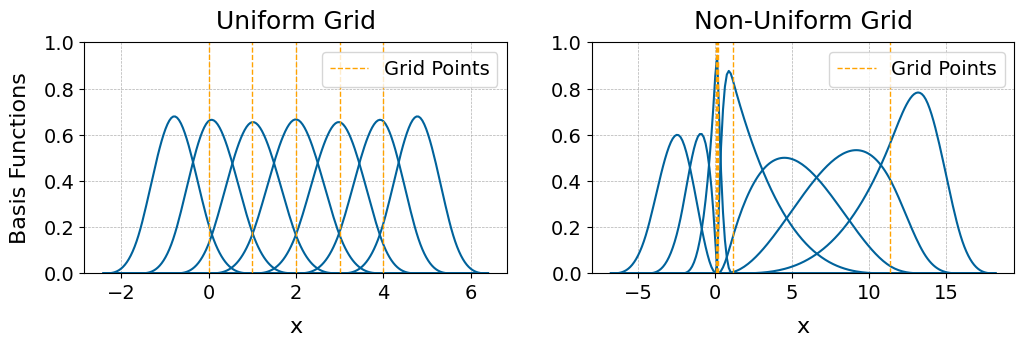

In [9]:
# Create the figure and axes for the two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
legend_fontsize = 14

# Plot for uniform grid
for i in range(uni_funcs.shape[1]):
    axs[0].plot(x_uni, uni_funcs[:, i], color='#00629B')
    
axs[0].set_title('Uniform Grid', fontsize=title_fontsize, pad=10)
axs[0].set_xlabel('x', fontsize=label_fontsize, labelpad=10)
axs[0].set_ylabel('Basis Functions', fontsize=label_fontsize, labelpad=10)
axs[0].set_axisbelow(True)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_ylim(0, 1)

# Draw vertical dashed lines and add them to the legend
for xc in uni_grid.flatten():
    axs[0].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Points')

# Plot for non-uniform grid
for i in range(non_uni_funcs.shape[1]):
    axs[1].plot(x_non_uni, non_uni_funcs[:, i], color='#00629B')
    
axs[1].set_title('Non-Uniform Grid', fontsize=title_fontsize, pad=10)
axs[1].set_xlabel('x', fontsize=label_fontsize, labelpad=10)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_axisbelow(True)
axs[1].set_ylim(0, 1)

# Draw vertical dashed lines and add them to the legend
for xc in non_uni_grid.flatten():
    axs[1].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Points')

# Set tick parameters for both plots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Legend
handles, labels = axs[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[0].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

handles, labels = axs[1].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[1].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig('figures/splines.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

## Section IV - ReLU Basis Plots

In [10]:
def augment_grid(grid, k, p):
    ext_grid = grid
    
    for _ in range(p):
        # Calculate start point using its k nearest neighbors
        start_p = ext_grid[:, 0] - (1/k) * (ext_grid[:, k] - ext_grid[:, 0])
        # Cast to shape (n_in*n_out, 1)
        start_point = jnp.expand_dims(start_p, axis=-1)
        
        # Calculate end point using its k nearest neighbors
        end_p = ext_grid[:, -1] + (1/k) * (ext_grid[:, -1] - ext_grid[:, -k-1])
        # Cast to shape (n_in*n_out, 1)
        end_point = jnp.expand_dims(end_p, axis=-1)
        
        # Add zero point and end point to the grid
        ext_grid = jnp.concatenate((start_point, ext_grid, end_point), axis=1)

    return ext_grid

def calculate_es_values(grid, p):
    grid_center = grid[:, p:-p]
    s_values = grid_center - (grid[:, 2*p:] - grid[:, :-2*p]) / 2
    e_values = 2 * grid_center - s_values
    # Also calculate r
    r = 4.0/((e_values - s_values)**2)
    return s_values, e_values, r

from bases.relus import get_R_basis

In [11]:
# Preliminaries
N = 5
num_x = 200
k = 3
p = 2

# -------------------------
# Define uniform grid
# -------------------------
# Use the previously defined uni_grid
uni_grid_aug = augment_grid(uni_grid, k, p)

# Calculate (e, s) values for the initial grid points
S, E, r = calculate_es_values(uni_grid_aug, p)

# Generate x values for plotting
x_uni = jnp.linspace(uni_grid_aug[0,0]-0.5, uni_grid_aug[0,-1]+0.5, num_x)
x_ext = jnp.expand_dims(x_uni, axis=1)
x_reshaped = jnp.transpose(x_ext, (1, 0))

# Call the function
basis_r = get_R_basis(x_reshaped, S, E, r)

# Reshape
uni_r = jnp.transpose(basis_r, (2, 1, 0)).squeeze(-1)

# -------------------------
# Define non-uniform grid
# -------------------------
# Use the previously defined non_uni_grid
non_uni_grid_aug = augment_grid(non_uni_grid, k, p)

# Calculate (e, s) values for the initial grid points
S, E, r = calculate_es_values(non_uni_grid_aug, p)

# Generate x values for plotting
x_non_uni = jnp.linspace(non_uni_grid_aug[0,0]-6.5, non_uni_grid_aug[0,-1]+2.0, num_x)
x_ext = jnp.expand_dims(x_non_uni, axis=1)
x_reshaped = jnp.transpose(x_ext, (1, 0))

# Call the function
basis_r = get_R_basis(x_reshaped, S, E, r)

# Reshape
non_uni_r = jnp.transpose(basis_r, (2, 1, 0)).squeeze(-1)

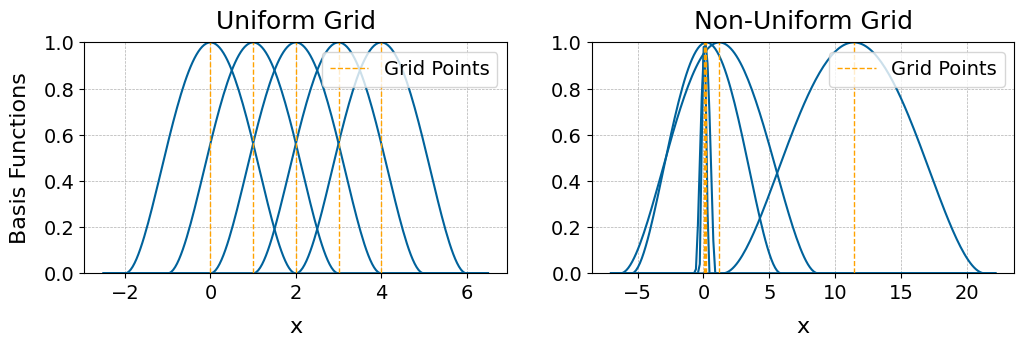

In [12]:
# Create the figure and axes for the two plots
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
legend_fontsize = 14

# Plot for uniform grid
for i in range(uni_r.shape[1]):
    axs[0].plot(x_uni, uni_r[:, i], color='#00629B')
    
axs[0].set_title('Uniform Grid', fontsize=title_fontsize, pad=10)
axs[0].set_xlabel('x', fontsize=label_fontsize, labelpad=10)
axs[0].set_ylabel('Basis Functions', fontsize=label_fontsize, labelpad=10)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_ylim(0, 1)
axs[0].set_axisbelow(True)

# Draw vertical dashed lines and add them to the legend
for xc in uni_grid.flatten():
    axs[0].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Points')

# Plot for non-uniform grid
for i in range(non_uni_r.shape[1]):
    axs[1].plot(x_non_uni, non_uni_r[:, i], color='#00629B')
    
axs[1].set_title('Non-Uniform Grid', fontsize=title_fontsize, pad=10)
axs[1].set_xlabel('x', fontsize=label_fontsize, labelpad=10)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_ylim(0, 1)
axs[1].set_axisbelow(True)

# Draw vertical dashed lines and add them to the legend
for xc in non_uni_grid.flatten():
    axs[1].axvline(x=xc, color='#FFA300', linestyle='--', linewidth=1, label='Grid Points')

# Set tick parameters for both plots
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Legend
handles, labels = axs[0].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[0].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

handles, labels = axs[1].get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
axs[1].legend(unique_labels.values(), unique_labels.keys(), fontsize=legend_fontsize, loc='upper right')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.2)

# Save the figure as a PDF with specified DPI and remove bounding box
plt.savefig('figures/rbasis.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

## Section IV - ReLU-KAN Results Plots

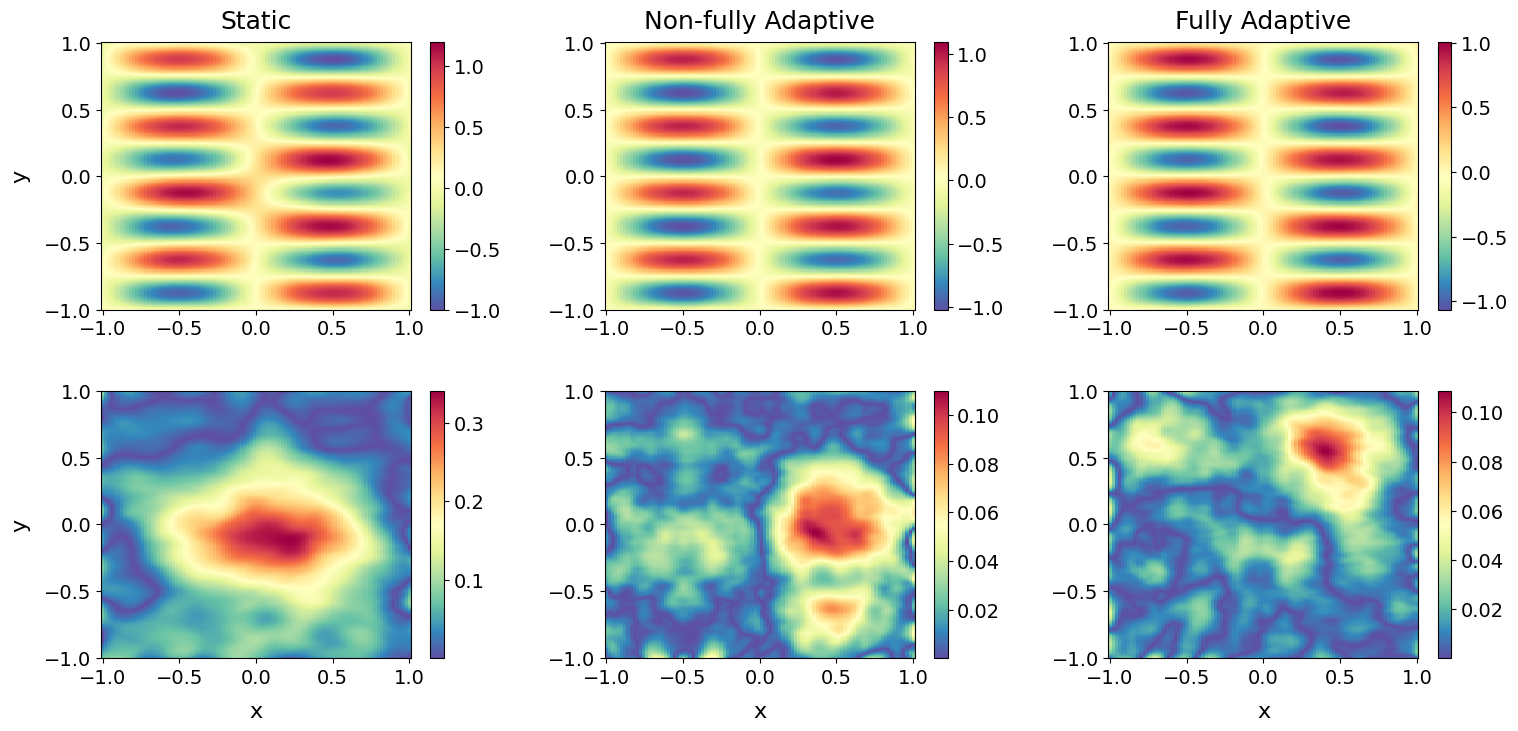

In [4]:
# Load the data
relu1 = np.load(data_dir+'relu1.npz')
relu2 = np.load(data_dir+'relu2.npz')
relu3 = np.load(data_dir+'relu3.npz')
RRs = [relu1['res'], relu2['res'], relu3['res']]

# Extract x,y,ref data from one
x = relu1['x']
y = relu1['y']

# Create mesh
X, Y = np.meshgrid(x, y)

ref = relu1['ref']

# Calculate errors
err1 = np.abs(ref - relu1['res'])
err2 = np.abs(ref - relu2['res'])
err3 = np.abs(ref - relu3['res'])
EEs = [err1, err2, err3]

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Titles for the columns
column_titles = ['Static', 'Non-fully Adaptive', 'Fully Adaptive']

colormap = 'Spectral_r'#sns.color_palette("flare", as_cmap=True)

# Font sizes
title_fontsize = 18
label_fontsize = 16
ticks_fontsize = 14
colorbar_fontsize = 14
legend_fontsize = 12

# Iterate over each case
for i, _ in enumerate(RRs):
    res, error = RRs[i], EEs[i]

    # Plot Solution
    ax = axs[0, i]
    c = ax.pcolormesh(X, Y, res.T, shading='auto', cmap=colormap)
    cb = fig.colorbar(c, ax=ax)
    if i == 0:
        ax.set_ylabel('y', fontsize=label_fontsize, labelpad=10)
    #ax.set_xlabel('x', fontsize=label_fontsize, labelpad=10)
    cb.ax.tick_params(labelsize=colorbar_fontsize)
    ax.set_title(column_titles[i], fontsize=title_fontsize, pad=10)
    
    # Plot error
    ax = axs[1, i]
    c = ax.pcolormesh(X, Y, error.T, shading='auto', cmap=colormap)
    cb = fig.colorbar(c, ax=ax)
    if i == 0:
        ax.set_ylabel('y', fontsize=label_fontsize, labelpad=10)
    ax.set_xlabel('x', fontsize=label_fontsize, labelpad=10)
    cb.ax.tick_params(labelsize=colorbar_fontsize)


# Set tick parameters for all subplots
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#plt.tight_layout()
plt.savefig('figures/relukan.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/relukan.png', bbox_inches='tight')
plt.show()